# **UTS**

## Implementasi Algoritma K-NN

### Konsep K-NN

k-NN (k-Nearest-Neighbors) merupakan sebuah algoritma yang digunakan untuk menentukan sebuah label dari data labeh yang sudah tersedia. k-NN ini memeliki 5 algoritma yang digunakan

1. Menentukan nilai K
2. Menghitung jarak antara data uji dengan data latih (menggunakan Minkowski Distance)
3. Mengurutkan jarak dari terkecil hingga terbesar (Ascending)
4. Mengambil data sebanyak K terdekat
5. Memilih kelas

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import missingno as no
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

%matplotlib inline

### Mengambil dataset

dataset diambil di website https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra kemudian didownload dan di upload di github dan dijadikan raw.

### Mengambil dataset dari github

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dimasmhrdka/data-csv/main/dataR2.csv")
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


### Jumlah data dari dataset

Banyaknya data yaitu 116 dan jumlah kolomnya yaitu 10 kolom

In [13]:
df.shape

(116, 10)

In [14]:
X = df.iloc[:, 0:9].values 
Y = df.iloc[:,9].values

### Mengubah Kolom kedalam dataframe

In [15]:
all_columns=['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin', 'MCP.1']

X = pd.DataFrame(X,columns=all_columns[0:9])
all_columns[0:9]
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48.0,23.500000,70.0,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83.0,20.690495,92.0,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82.0,23.124670,91.0,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68.0,21.367521,77.0,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86.0,21.111111,92.0,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [16]:
Y[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

### Data Uji & Data Training

Data training yang dipakai sebesar 20% dari dataset atau sekitar 23 data sebagai data training dan sisanya sebagai data uji.

K yang digunakan yaitu K=6. dengan perhitungan minkowski.

In [17]:
#Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[-0.90580006, -0.60223851,  0.39996142,  5.41266386,  3.97788424,
        -0.48294549,  1.01615946, -0.73302693, -0.83359765],
       [-1.1590937 , -0.01445999,  0.26128133, -0.79254154, -0.59226514,
        -0.67908362, -0.50242597,  0.88574816, -0.67899565],
       [-0.84247665, -0.17399633, -0.24721234, -0.69308636, -0.54932947,
         1.38357642,  0.36413531, -0.29126418, -0.75855465],
       [ 0.9939022 ,  0.19135671, -0.43211912, -0.72830546, -0.58107469,
         0.17960335, -0.36087967,  0.28699465,  0.21358775],
       [ 0.93057879, -1.15834447, -0.01607885, -0.69087133, -0.53504167,
        -1.18263566,  0.08029698, -0.65683654, -1.17843428]])

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

#print model accuracy on the training data.
print('Akurasi Data Training', knn.score(X_train, Y_train))

Akurasi Data Training 0.75


### Hasil Akurasi & Confusion Matrix

In [20]:
#Show other ways to get the classification accuracy & other metrics 
 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np

#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, knn.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, knn.predict(X_test)))
print(F'Precision:', precision_score(Y_test, knn.predict(X_test)))
print(F'Recall:', recall_score(Y_test, knn.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, knn.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, knn.predict(X_test)) )

print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, knn.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, knn.predict(X_test)) )
print()#Print a new line

              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.91      0.77      0.83        13

    accuracy                           0.83        24
   macro avg       0.84      0.84      0.83        24
weighted avg       0.84      0.83      0.83        24

Accuracy: 0.8333333333333334
Precision: 0.7692307692307693
Recall: 0.9090909090909091
F1 Score: 0.8333333333333333
Roc Auc Score: 0.8391608391608392
Balanced Accuracy Score: 0.8391608391608392
Confusion Matrix: [[10  1]
 [ 3 10]]



### Kesimpulan

Dari 116 data dan 10 kolom dan data uji sebanyak 93 dan training sebanyak 23 dengan K=6, maka akan dihasilkan akurasi sebesar 0.83


## Implementasi Algoritma Decision Tree

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
%matplotlib inline

import itertools

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel

In [22]:
dataset = pd.read_csv("https://raw.githubusercontent.com/dimasmhrdka/data-csv/main/dataR2.csv")
dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [29]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

In [30]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, Y_train)

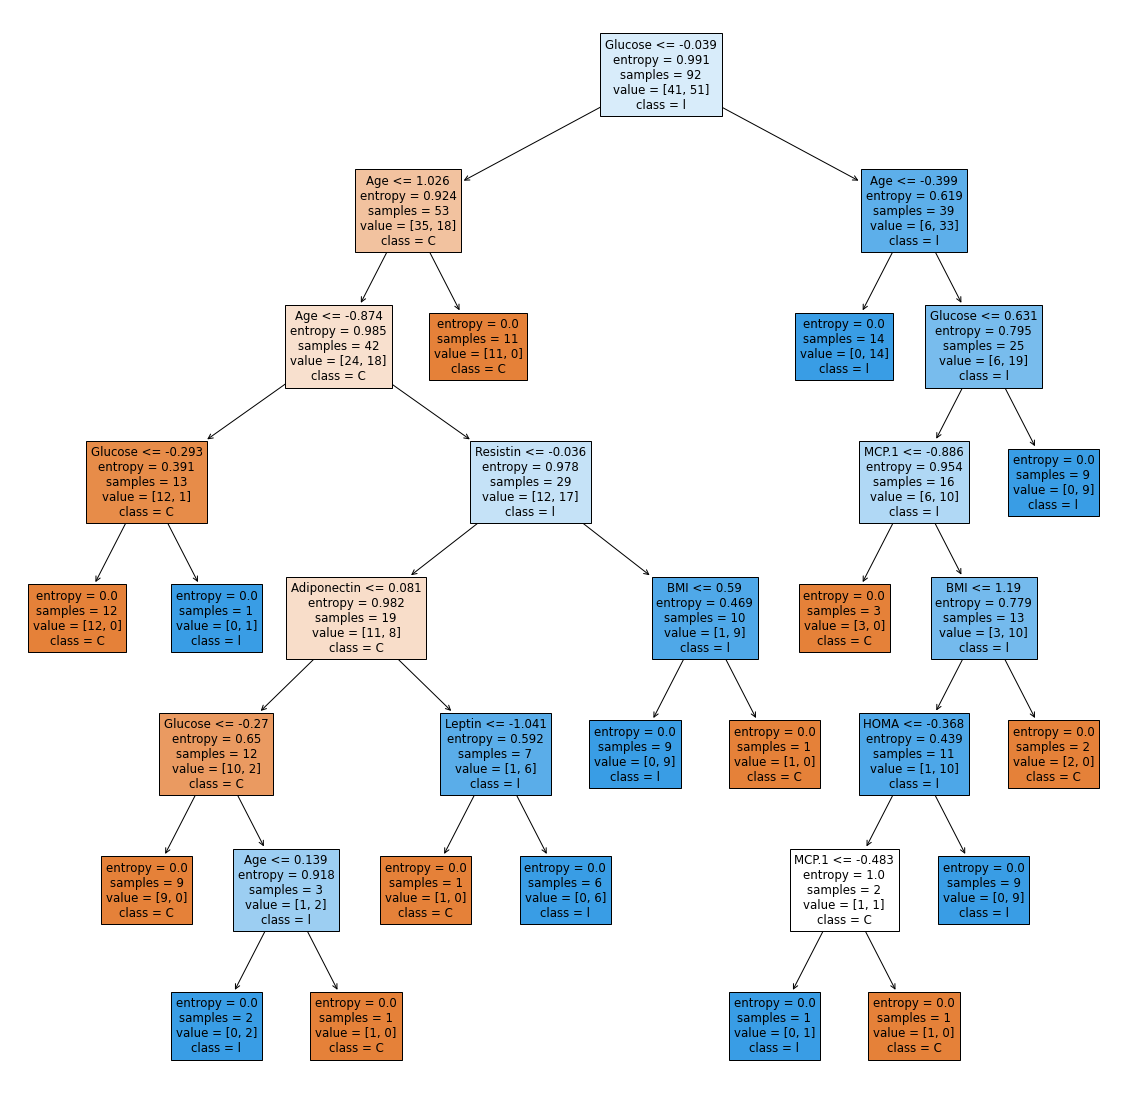

In [32]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, feature_names=list(dataset.columns.values)[:9], class_names=list(dataset.columns.values)[9] ,filled=True)

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree.fit(X_train, Y_train)

print('Akurasi Data Training:', tree.score(X_train, Y_train))

Akurasi Data Training: 1.0


In [24]:
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, tree.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, tree.predict(X_test)))
print(F'Precision:', precision_score(Y_test, tree.predict(X_test)))
print(F'Recall:', recall_score(Y_test, tree.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, tree.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, tree.predict(X_test)) )

print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, tree.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, tree.predict(X_test)) )
print()#Print a new line

              precision    recall  f1-score   support

           1       0.50      0.55      0.52        11
           2       0.58      0.54      0.56        13

    accuracy                           0.54        24
   macro avg       0.54      0.54      0.54        24
weighted avg       0.55      0.54      0.54        24

Accuracy: 0.5416666666666666
Precision: 0.5
Recall: 0.5454545454545454
F1 Score: 0.5217391304347826
Roc Auc Score: 0.5419580419580419
Balanced Accuracy Score: 0.5419580419580419
Confusion Matrix: [[6 5]
 [6 7]]

